In [33]:
import pandas as pd
import numpy as np
import os
import git
from datetime import datetime
import nltk
nltk.download('vader_lexicon')
from tqdm.auto import tqdm
from dateutil.relativedelta import relativedelta
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/drew_william2345/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [3]:
top_dir = get_git_root(os.getcwd())
input_dir = os.path.join(top_dir,"input")

In [4]:
juul_data = pd.read_csv(os.path.join(input_dir,"juul_data.csv"),lineterminator="\n")
user_data = pd.read_csv(os.path.join(input_dir,"user_data.csv"),lineterminator="\n")

In [5]:
## no of users
len(juul_data.userID.unique())

887180

In [6]:
## extarct the data for 2018 and look at the sentiments

In [7]:
## extract 2018 data 
juul_data["tweetCreatedAt"] = pd.to_datetime(juul_data["tweetCreatedAt"])

In [8]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores("this is good")  ## test

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [40]:
## 67 % of retweet data
len(juul_data.loc[juul_data.retweeted == True]) / len(juul_data)

0.6757790593434232

In [18]:
pos_sentiment= []
neg_sentiment = []
neutral_sentiment = []
compound_sentiment = []
dates = []
start = datetime(2018,1,1)
for i in tqdm(range(12)):
    next_ = start + relativedelta(months=1)
    print(start.strftime("%b"))
    data = juul_data.loc[(juul_data["tweetCreatedAt"] >= start ) & (juul_data["tweetCreatedAt"] < next_)]
    print(len(data))
    count = 0
    pos_value = 0
    neg_value = 0
    neutral_value = 0
    compound_value= 0
    for sentence in tqdm(list(data.tweetText)):
        ss = sid.polarity_scores(sentence)
        pos_value += ss["pos"]
        neg_value += ss["neg"]
        neutral_value += ss["neu"]
        compound_value += ss["compound"]
        count += 1
    pos_sentiment.append(pos_value/ count)
    neg_sentiment.append(neg_value/ count)
    compound_sentiment.append(compound_value/ count)
    neutral_sentiment.append(neutral_value/ count)
    dates.append(start.strftime("%b"))
    start = next_

Jan
64275


Feb
57121


Mar
78153


Apr
102004


May
112754


Jun
134507


Jul
151713


Aug
155437


Sep
132445


Oct
154867


Nov
167740


Dec
162147


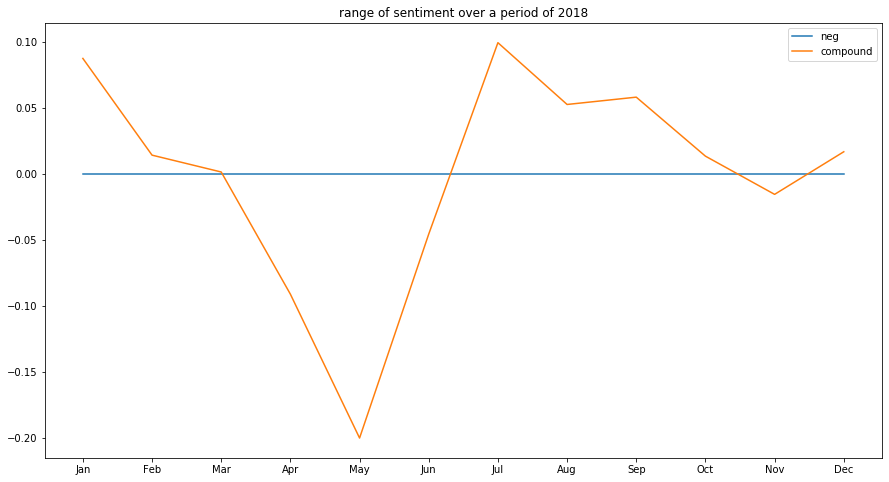

In [29]:
plt.figure(figsize=(15,8))
# dates = [str(date) for date in dates]
# plt.plot(dates,pos_sentiment,label="pos")
# plt.plot(dates,neg_sentiment,label="neg")
plt.plot(dates,np.zeros(len(dates)),label="neg")
plt.plot(dates,compound_sentiment,label="compound")
plt.title("range of sentiment over a period of 2018")
plt.legend()
plt.show()

In [30]:
data = juul_data.loc[(juul_data["tweetCreatedAt"] >= datetime(2018,5,1) ) & (juul_data["tweetCreatedAt"] < datetime(2018,6,1))]

In [ ]:
## remove the promoter and news and check the sentiment again